In [1]:
import pandas as pd

# Load datasets with the verified path
path = '/content/'
orders = pd.read_csv(f'{path}olist_orders_dataset.csv')
items = pd.read_csv(f'{path}olist_order_items_dataset.csv')
products = pd.read_csv(f'{path}olist_products_dataset.csv')
translation = pd.read_csv(f'{path}product_category_name_translation.csv')

# Merge logic to create a unified BI view
df = pd.merge(items, products, on='product_id', how='left')
df = pd.merge(df, translation, on='product_category_name', how='left')
final_df = pd.merge(df, orders, on='order_id', how='left')

print("Success: Master Dataset created for Business Intelligence analysis.")
final_df[['order_id', 'product_category_name_english', 'price']].head()

Success: Master Dataset created for Business Intelligence analysis.


,order_id,product_category_name_english,price
0,00010242fe8c5a6d1ba2dd792cb16214,cool_stuff,58.90
1,00018f77f2f0320c557190d7a144bdd3,pet_shop,239.90
2,000229ec398224ef6ca0657da4fc703e,furniture_decor,199.00
3,00024acbcdf0a6daa1e931b038114c75,perfumery,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,garden_tools,199.90


In [2]:
# Convert strings to datetime objects for calculations [cite: 74]
final_df['order_delivered_customer_date'] = pd.to_datetime(final_df['order_delivered_customer_date'])
final_df['order_estimated_delivery_date'] = pd.to_datetime(final_df['order_estimated_delivery_date'])

# Identify late shipments (Logical Reasoning) [cite: 75, 76]
final_df['is_late'] = final_df['order_delivered_customer_date'] > final_df['order_estimated_delivery_date']

# Grouping to find top bottlenecks [cite: 78, 131]
late_analysis = final_df.groupby('product_category_name_english')['is_late'].mean().sort_values(ascending=False).head(10)

print("Top 10 Categories with highest delivery delay rates:")
print(late_analysis)

Top 10 Categories with highest delivery delay rates:
product_category_name_english
home_comfort_2                       0.166667
furniture_mattress_and_upholstery    0.131579
audio                                0.126374
fashion_underwear_beach              0.122137
christmas_supplies                   0.117647
books_technical                      0.108614
home_confort                         0.101382
construction_tools_lights            0.098684
electronics                          0.096133
food                                 0.096078
Name: is_late, dtype: float64


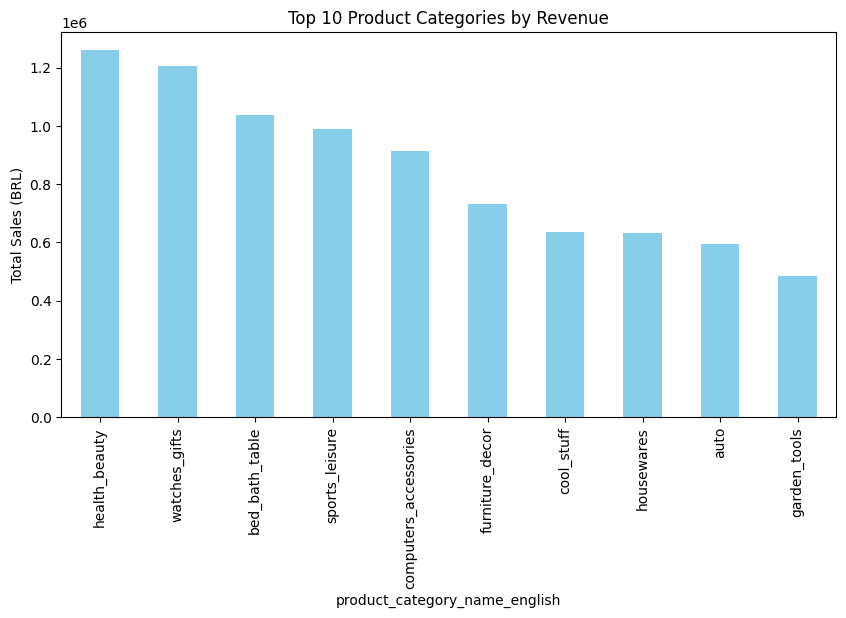

In [3]:
# Aggregate sales data [cite: 130]
revenue_summary = final_df.groupby('product_category_name_english')['price'].sum().sort_values(ascending=False).head(10)

# Visualize for "Clear Insights" [cite: 131, 134]
import matplotlib.pyplot as plt
revenue_summary.plot(kind='bar', color='skyblue', figsize=(10,5))
plt.title('Top 10 Product Categories by Revenue')
plt.ylabel('Total Sales (BRL)')
plt.show()

In [4]:
# Export the final processed file [cite: 120]
final_df.to_csv('Ecommerce_Cleaned.csv', index=False)
print("File exported! You can now upload this to Power BI for dashboarding.")

File exported! You can now upload this to Power BI for dashboarding.


In [5]:
# Select only the columns needed for the MEGABAD dashboard
lean_columns = [
    'order_id', 'product_category_name_english', 'price',
    'is_late', 'order_status', 'customer_id'
]

# Create a smaller version of the dataset
lean_df = final_df[lean_columns]

# Export as a compressed CSV or a standard CSV
lean_df.to_csv('Dashboard_Final.csv', index=False)
print("Optimization complete. Download this smaller file.")

Optimization complete. Download this smaller file.
